In [1]:
import cv2
import numpy as np
import copy
import random

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

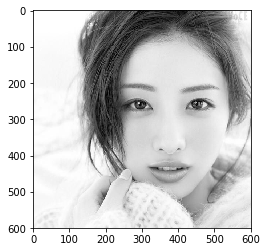

In [4]:
# 读取灰度图
img = cv2.imread("/Users/ruixiao/Downloads/test.jpg",0)
plt.imshow(img, 'gray')

In [5]:
#给灰度图像自动添加椒盐噪音
pepper_img = copy.deepcopy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if random.randint(0, 20) == 0:
            pix = random.randint(250, 255)
            pepper_img[i, j] = pix

In [6]:
pepper_img.shape

(600, 600)

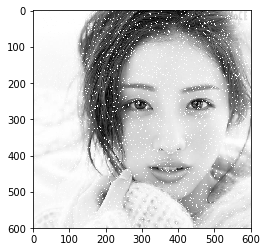

In [7]:
plt.imshow(pepper_img, 'gray')

In [8]:
#实现中值滤波器
kernel = np.zeros((3,3))
median_img = copy.deepcopy(pepper_img)
output = np.zeros((pepper_img.shape[0],pepper_img.shape[1]))
for i in range(pepper_img.shape[0]-2):
    for j in range(pepper_img.shape[1]-2):
        kernel[0][0] = pepper_img[i][j]
        kernel[0][1] = pepper_img[i][j+1]
        kernel[0][2] = pepper_img[i][j+2]
        kernel[1][0] = pepper_img[i+1][j]
        kernel[1][1] = pepper_img[i+1][j+1]
        kernel[1][2] = pepper_img[i+1][j+2]
        kernel[2][0] = pepper_img[i+2][j]
        kernel[2][1] = pepper_img[i+2][j+1]
        kernel[2][2] = pepper_img[i+2][j+2]
        median = np.sort(kernel)
        output[i+1, j+1] = median[1][1]

In [9]:
output

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0., 234., 232., ..., 239., 240.,   0.],
       [  0., 236., 236., ..., 241., 241.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [10]:
median

array([[239., 240., 241.],
       [241., 241., 241.],
       [241., 242., 242.]])

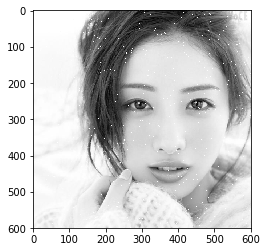

In [11]:
plt.imshow(output, 'gray')